This project looks at how vegetation health changes across locations and years during droughts. Three locations across southern California and Nevada were analyzed, an urban area, an agricultural area, and a desert area. Landsat data was analyzed at each location in 2013, 2014, 2015, and 2020. These dates were chosen because during the early 2010's, this region saw a severe drought. California was declared mostly drought-free in 2019, so a 2020 image was analyzed to see if plant health improved. To measure plant health, normalized difference vegetation index (ndvi) was calculated for each image and compared against other images.

In [1]:
from glob import glob
import os
import urllib
import requests

import rasterio as rio
from rasterio.plot import show
import xarray as xr
import rioxarray as rxr
import fiona
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio.mask


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import earthpy as ep
import earthpy.mask as em
from PIL import Image

from rasterio.enums import Resampling

In [2]:
os.chdir(r'C:\Users\jdbas\Urban2013')
cwd13U=os.getcwd()

In [3]:
fp13U = glob(os.path.join(cwd13U,'*S*_B*.tif'))
fp13U

['C:\\Users\\jdbas\\Urban2013\\LC08_L2SP_041036_20131223_20200912_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Urban2013\\LC08_L2SP_041036_20131223_20200912_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Urban2013\\LC08_L2SP_041036_20131223_20200912_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Urban2013\\LC08_L2SP_041036_20131223_20200912_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Urban2013\\LC08_L2SP_041036_20131223_20200912_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Urban2013\\LC08_L2SP_041036_20131223_20200912_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Urban2013\\LC08_L2SP_041036_20131223_20200912_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Urban2013\\LC08_L2SP_041036_20131223_20200912_02_T1_ST_B10.TIF']

In [4]:
b113U = rio.open(fp13U[0])
b213U = rio.open(fp13U[1])
b313U = rio.open(fp13U[2])
b413U = rio.open(fp13U[3])
b513U = rio.open(fp13U[4])
b613U = rio.open(fp13U[5])
b713U = rio.open(fp13U[6])

type(b113U)

rasterio.io.DatasetReader

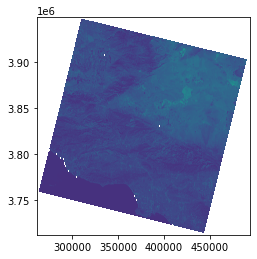

<AxesSubplot:>

In [5]:
show(b413U)

In [6]:
nir13U = b513U.read(1).astype(float)
red13U = b413U.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/1785762333.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi13U = (nir13U-red13U)/(nir13U+red13U)


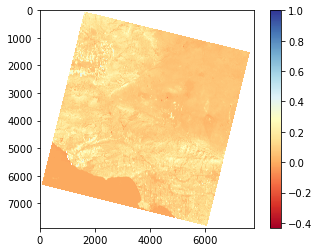

In [7]:
#Calculating ndvi for the 2013 image
ndvi13U = (nir13U-red13U)/(nir13U+red13U)
plt.imshow(ndvi13U, cmap = 'RdYlBu')
plt.colorbar()

In [8]:
#Average ndvi values for the 2013 image
np.nanmean(ndvi13U)

0.09725094597865937

In [9]:
os.chdir(r'C:\Users\jdbas\Urban2014')
cwd14U=os.getcwd()

In [10]:
fp14U = glob(os.path.join(cwd14U,'*S*_B*.tif'))
fp14U

['C:\\Users\\jdbas\\Urban2014\\LC08_L2SP_041036_20141226_20200910_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Urban2014\\LC08_L2SP_041036_20141226_20200910_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Urban2014\\LC08_L2SP_041036_20141226_20200910_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Urban2014\\LC08_L2SP_041036_20141226_20200910_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Urban2014\\LC08_L2SP_041036_20141226_20200910_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Urban2014\\LC08_L2SP_041036_20141226_20200910_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Urban2014\\LC08_L2SP_041036_20141226_20200910_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Urban2014\\LC08_L2SP_041036_20141226_20200910_02_T1_ST_B10.TIF']

In [11]:
b114U = rio.open(fp14U[0])
b214U = rio.open(fp14U[1])
b314U = rio.open(fp14U[2])
b414U = rio.open(fp14U[3])
b514U = rio.open(fp14U[4])
b614U = rio.open(fp14U[5])
b714U = rio.open(fp14U[6])

type(b114U)

rasterio.io.DatasetReader

In [12]:
b114U.crs

CRS.from_epsg(32611)

In [13]:
nir14U = b514U.read(1).astype(float)
red14U = b414U.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/3771160916.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi14U = (nir14U-red14U)/(nir14U+red14U)


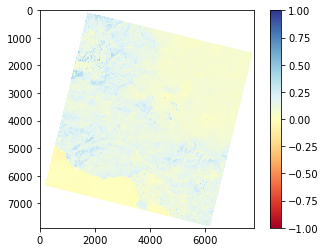

In [14]:
#Calculating ndvi for the 2014 image
ndvi14U = (nir14U-red14U)/(nir14U+red14U)
plt.imshow(ndvi14U, cmap = 'RdYlBu')
plt.colorbar()

In [15]:
#Average ndvi values for the 2014 image
np.nanmean(ndvi14U)

0.11156640730109103

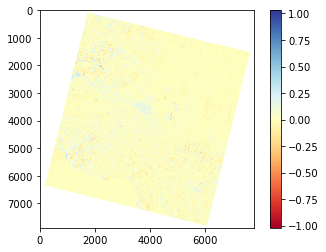

In [16]:
#Calculating ndvi change from 2013 to 2014
ndvi13_14U = ndvi14U - ndvi13U
plt.imshow(ndvi13_14U, cmap = 'RdYlBu')
plt.colorbar()

In [17]:
#ndvi change from 2013 to 2014
((np.nanmean(ndvi14U)-np.nanmean(ndvi13U))/np.nanmean(ndvi13U))*100

14.720125525126546

In [18]:
os.chdir(r'C:\Users\jdbas\Urban2020')
cwd20U=os.getcwd()

In [19]:
fp20U = glob(os.path.join(cwd20U,'*S*_B*.tif'))
fp20U

['C:\\Users\\jdbas\\Urban2020\\LC08_L2SP_041036_20201226_20210310_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Urban2020\\LC08_L2SP_041036_20201226_20210310_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Urban2020\\LC08_L2SP_041036_20201226_20210310_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Urban2020\\LC08_L2SP_041036_20201226_20210310_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Urban2020\\LC08_L2SP_041036_20201226_20210310_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Urban2020\\LC08_L2SP_041036_20201226_20210310_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Urban2020\\LC08_L2SP_041036_20201226_20210310_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Urban2020\\LC08_L2SP_041036_20201226_20210310_02_T1_ST_B10.TIF']

In [20]:
b120U = rio.open(fp20U[0])
b220U = rio.open(fp20U[1])
b320U = rio.open(fp20U[2])
b420U = rio.open(fp20U[3])
b520U = rio.open(fp20U[4])
b620U = rio.open(fp20U[5])
b720U = rio.open(fp20U[6])

type(b120U)

rasterio.io.DatasetReader

In [21]:
nir20U = b520U.read(1).astype(float)
red20U = b420U.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/4134617507.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi20U = (nir20U-red20U)/(nir20U+red20U)


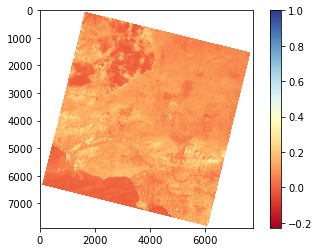

In [22]:
#Calculating ndvi for 2020 image
ndvi20U = (nir20U-red20U)/(nir20U+red20U)
plt.imshow(ndvi20U, cmap = 'RdYlBu')
plt.colorbar()

In [23]:
os.chdir(r'C:\Users\jdbas\Urban2015')
cwd15U=os.getcwd()

In [24]:
fp15U = glob(os.path.join(cwd15U,'*S*_B*.tif'))
fp15U

['C:\\Users\\jdbas\\Urban2015\\LC08_L2SP_041036_20151213_20200908_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Urban2015\\LC08_L2SP_041036_20151213_20200908_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Urban2015\\LC08_L2SP_041036_20151213_20200908_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Urban2015\\LC08_L2SP_041036_20151213_20200908_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Urban2015\\LC08_L2SP_041036_20151213_20200908_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Urban2015\\LC08_L2SP_041036_20151213_20200908_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Urban2015\\LC08_L2SP_041036_20151213_20200908_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Urban2015\\LC08_L2SP_041036_20151213_20200908_02_T1_ST_B10.TIF']

In [25]:
b415U = rio.open(fp15U[3])
b515U = rio.open(fp15U[4])


type(b415U)

rasterio.io.DatasetReader

In [26]:
nir15U = b515U.read(1).astype(float)
red15U = b415U.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/3914949656.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi15U = (nir15U-red15U)/(nir15U+red15U)


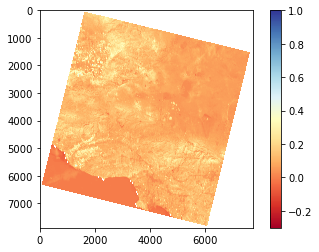

In [27]:
#Calculating ndvi for 2015 image
ndvi15U = (nir15U-red15U)/(nir15U+red15U)
plt.imshow(ndvi15U, cmap = 'RdYlBu')
plt.colorbar()

In [28]:
#Average ndvi values for the 2015 image
np.nanmean(ndvi15U)

0.10239596069175572

In [29]:
ndvi15_20U = ndvi20U - ndvi15U

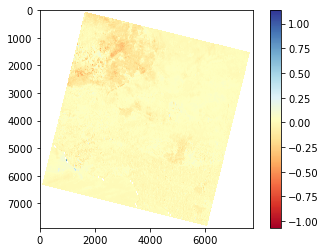

In [30]:
plt.imshow(ndvi15_20U, cmap = 'RdYlBu')
plt.colorbar()

In [31]:
#Average ndvi value change from 2015 to 2020 in the urban images
((np.nanmean(ndvi20U)-np.nanmean(ndvi15U))/np.nanmean(ndvi15U))*100

-5.676435111197803

In [32]:
#Average ndvi value change from 2013 to 2020 in the urban images
((np.nanmean(ndvi20U)-np.nanmean(ndvi13U))/np.nanmean(ndvi13U))*100

-0.6862920924236892

In [33]:
os.chdir(r'C:\Users\jdbas\Agricultural2013')
cwd13A=os.getcwd()

In [34]:
fp13A = glob(os.path.join(cwd13A,'*S*_B*.tif'))
fp13A

['C:\\Users\\jdbas\\Agricultural2013\\LC08_L2SP_042035_20131230_20200912_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Agricultural2013\\LC08_L2SP_042035_20131230_20200912_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Agricultural2013\\LC08_L2SP_042035_20131230_20200912_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Agricultural2013\\LC08_L2SP_042035_20131230_20200912_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Agricultural2013\\LC08_L2SP_042035_20131230_20200912_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Agricultural2013\\LC08_L2SP_042035_20131230_20200912_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Agricultural2013\\LC08_L2SP_042035_20131230_20200912_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Agricultural2013\\LC08_L2SP_042035_20131230_20200912_02_T1_ST_B10.TIF']

In [35]:
b413A = rio.open(fp13A[3])
b513A = rio.open(fp13A[4])


type(b413A)

rasterio.io.DatasetReader

In [36]:
type(b513A)

rasterio.io.DatasetReader

In [37]:
nir13A = b513A.read(1).astype(float)
red13A = b413A.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/1887323189.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi13A = (nir13A-red13A)/(nir13A+red13A)


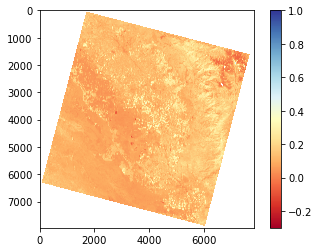

In [38]:
#Calculating ndvi for 2013 agricultural image
ndvi13A = (nir13A-red13A)/(nir13A+red13A)
plt.imshow(ndvi13A, cmap = 'RdYlBu')
plt.colorbar()

In [39]:
#Total ndvi values for the 2013 agricultural image
np.nanmean(ndvi13A)

0.12380845527848162

In [40]:
os.chdir(r'C:\Users\jdbas\Agricultural2014')
cwd14A=os.getcwd()

In [41]:
fp14A = glob(os.path.join(cwd14A,'*S*_B*.tif'))
fp14A

['C:\\Users\\jdbas\\Agricultural2014\\LC08_L2SP_042035_20141217_20200910_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Agricultural2014\\LC08_L2SP_042035_20141217_20200910_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Agricultural2014\\LC08_L2SP_042035_20141217_20200910_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Agricultural2014\\LC08_L2SP_042035_20141217_20200910_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Agricultural2014\\LC08_L2SP_042035_20141217_20200910_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Agricultural2014\\LC08_L2SP_042035_20141217_20200910_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Agricultural2014\\LC08_L2SP_042035_20141217_20200910_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Agricultural2014\\LC08_L2SP_042035_20141217_20200910_02_T1_ST_B10.TIF']

In [42]:
b414A = rio.open(fp14A[3])
b514A = rio.open(fp14A[4])

In [43]:
nir14A = b514A.read(1).astype(float)
red14A = b414A.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/1213424045.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi14A = (nir14A-red14A)/(nir14A+red14A)


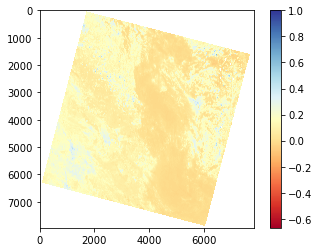

In [44]:
#Calculating ndvi for 2014 agricultural image
ndvi14A = (nir14A-red14A)/(nir14A+red14A)
plt.imshow(ndvi14A, cmap = 'RdYlBu')
plt.colorbar()

In [45]:
#Total ndvi values for the 2014 agricultural image
np.nanmean(ndvi14A)

0.09587887954293227

In [46]:
ndvi13A.resize(ndvi14A.shape, refcheck=False)

In [47]:
ndvi14A.size

62184771

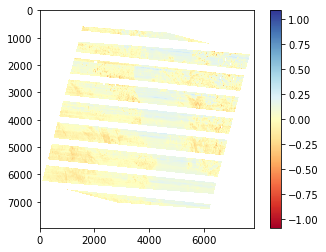

In [48]:
ndvi13_14A = ndvi13A - ndvi14A
plt.imshow(ndvi13_14A, cmap = 'RdYlBu')
plt.colorbar()

In [49]:
#Total ndvi change from 2013 to 2014 for the agricultural image
((np.nanmean(ndvi14A)-np.nanmean(ndvi13A))/np.nanmean(ndvi13A))*100

-22.558698170272397

In [50]:
os.chdir(r'C:\Users\jdbas\Agricultural2015')
cwd15A=os.getcwd()

In [51]:
fp15A = glob(os.path.join(cwd15A,'*S*_B*.tif'))
fp15A

['C:\\Users\\jdbas\\Agricultural2015\\LC08_L2SP_042035_20151204_20200908_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Agricultural2015\\LC08_L2SP_042035_20151204_20200908_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Agricultural2015\\LC08_L2SP_042035_20151204_20200908_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Agricultural2015\\LC08_L2SP_042035_20151204_20200908_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Agricultural2015\\LC08_L2SP_042035_20151204_20200908_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Agricultural2015\\LC08_L2SP_042035_20151204_20200908_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Agricultural2015\\LC08_L2SP_042035_20151204_20200908_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Agricultural2015\\LC08_L2SP_042035_20151204_20200908_02_T1_ST_B10.TIF']

In [52]:
b415A = rio.open(fp15A[3])
b515A = rio.open(fp15A[4])

In [53]:
nir15A = b515A.read(1).astype(float)
red15A = b415A.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/2399933413.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi15A = (nir15A-red15A)/(nir15A+red15A)


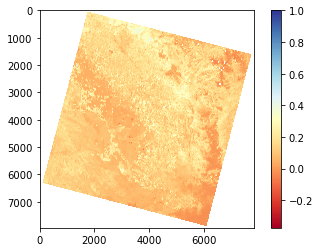

In [54]:
#Calculating ndvi for 2015 agricultural image
ndvi15A = (nir15A-red15A)/(nir15A+red15A)
plt.imshow(ndvi15A, cmap = 'RdYlBu')
plt.colorbar()

In [55]:
#Average ndvi in the 2015 agricultural image
np.nanmean(ndvi15A)

0.13204230536072264

In [56]:
os.chdir(r'C:\Users\jdbas\Agricultural2020_1')
cwd20A=os.getcwd()

In [57]:
fp20A = glob(os.path.join(cwd20A,'*S*_B*.tif'))
fp20A

['C:\\Users\\jdbas\\Agricultural2020_1\\LC08_L2SP_042035_20201201_20210312_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Agricultural2020_1\\LC08_L2SP_042035_20201201_20210312_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Agricultural2020_1\\LC08_L2SP_042035_20201201_20210312_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Agricultural2020_1\\LC08_L2SP_042035_20201201_20210312_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Agricultural2020_1\\LC08_L2SP_042035_20201201_20210312_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Agricultural2020_1\\LC08_L2SP_042035_20201201_20210312_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Agricultural2020_1\\LC08_L2SP_042035_20201201_20210312_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Agricultural2020_1\\LC08_L2SP_042035_20201201_20210312_02_T1_ST_B10.TIF']

In [58]:
b420A = rio.open(fp20A[3])
b520A = rio.open(fp20A[4])

In [59]:
nir20A = b520A.read(1).astype(float)
red20A = b420A.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/3935837371.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi20A = (nir20A-red20A)/(nir20A+red20A)


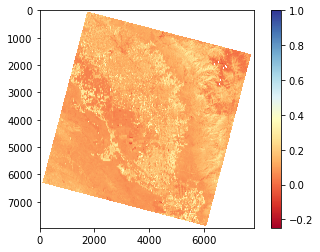

In [60]:
#Calculating ndvi for 2020 agricultural image
ndvi20A = (nir20A-red20A)/(nir20A+red20A)
plt.imshow(ndvi20A, cmap = 'RdYlBu')
plt.colorbar()

In [61]:
#Total ndvi in the 2020 agricultural image
np.nanmean(ndvi20A)

0.13088998225292872

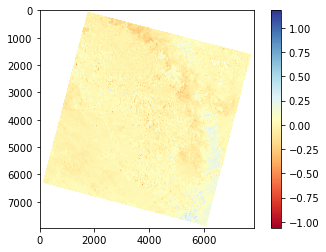

In [62]:
#Caluculating the ndvi change from 2015 to 2020
ndvi15_20A = ndvi20A - ndvi15A
plt.imshow(ndvi15_20A, cmap = 'RdYlBu')
plt.colorbar()

In [63]:
#Total ndvi change from the 2015 agricultural image to the 2020 agricultural image
((np.nanmean(ndvi20A)-np.nanmean(ndvi15A))/np.nanmean(ndvi15A))*100

-0.8726923576848529

In [64]:
#Total ndvi change from the 2013 agricultural image to the 2020 agricultural image
((np.nanmean(ndvi20A)-np.nanmean(ndvi13A))/np.nanmean(ndvi13A))*100

5.719744227903225

In [65]:
os.chdir(r'C:\Users\jdbas\Desert2013')
cwd13D=os.getcwd()

In [66]:
fp13D = glob(os.path.join(cwd13D,'*S*_B*.tif'))
fp13D

['C:\\Users\\jdbas\\Desert2013\\LC08_L2SP_039035_20131225_20200912_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Desert2013\\LC08_L2SP_039035_20131225_20200912_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Desert2013\\LC08_L2SP_039035_20131225_20200912_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Desert2013\\LC08_L2SP_039035_20131225_20200912_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Desert2013\\LC08_L2SP_039035_20131225_20200912_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Desert2013\\LC08_L2SP_039035_20131225_20200912_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Desert2013\\LC08_L2SP_039035_20131225_20200912_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Desert2013\\LC08_L2SP_039035_20131225_20200912_02_T1_ST_B10.TIF']

In [67]:
b413D = rio.open(fp13D[3])
b513D = rio.open(fp13D[4])

In [68]:
nir13D = b513D.read(1).astype(float)
red13D = b413D.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/116653602.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi13D = (nir13D-red13D)/(nir13D+red13D)


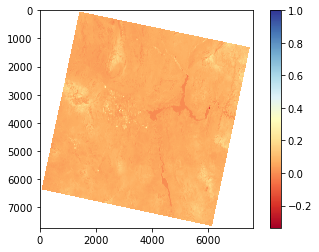

In [69]:
#Calculating ndvi for 2013 desert image
ndvi13D = (nir13D-red13D)/(nir13D+red13D)
plt.imshow(ndvi13D, cmap = 'RdYlBu')
plt.colorbar()

In [70]:
#Average ndvi in the 2013 desert image
np.nanmean(ndvi13D)

0.0691331603123858

In [71]:
os.chdir(r'C:\Users\jdbas\Desert2014')
cwd14D=os.getcwd()

In [72]:
fp14D = glob(os.path.join(cwd14D,'*S*_B*.tif'))
fp14D

['C:\\Users\\jdbas\\Desert2014\\LC08_L2SP_039035_20141110_20200910_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Desert2014\\LC08_L2SP_039035_20141110_20200910_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Desert2014\\LC08_L2SP_039035_20141110_20200910_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Desert2014\\LC08_L2SP_039035_20141110_20200910_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Desert2014\\LC08_L2SP_039035_20141110_20200910_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Desert2014\\LC08_L2SP_039035_20141110_20200910_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Desert2014\\LC08_L2SP_039035_20141110_20200910_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Desert2014\\LC08_L2SP_039035_20141110_20200910_02_T1_ST_B10.TIF']

In [73]:
b414D = rio.open(fp14D[3])
b514D = rio.open(fp14D[4])

In [74]:
nir14D = b514D.read(1).astype(float)
red14D = b414D.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/4084981453.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi14D = (nir14D-red14D)/(nir14D+red14D)


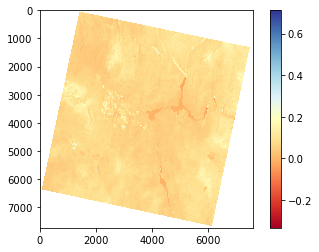

In [75]:
#Calculating ndvi for 2014 desert image
ndvi14D = (nir14D-red14D)/(nir14D+red14D)
plt.imshow(ndvi14D, cmap = 'RdYlBu')
plt.colorbar()

In [76]:
#Average ndvi in the 2014 desert image
np.nanmean(ndvi14D)

0.0735657953701542

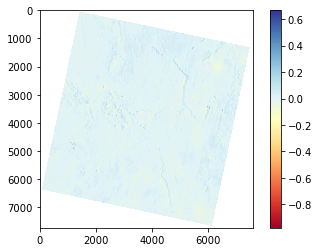

In [77]:
#Caluculating the ndvi change from 2013 to 2014 desert images
ndvi13_14D = ndvi14D - ndvi13D
plt.imshow(ndvi13_14D, cmap = 'RdYlBu')
plt.colorbar()

In [78]:
#Percent ndvi change from 2013 to 2014 in the desert images
((np.nanmean(ndvi14D)-np.nanmean(ndvi13D))/np.nanmean(ndvi13D))*100

6.411735030973639

In [79]:
os.chdir(r'C:\Users\jdbas\Desert2015')
cwd15D=os.getcwd()

In [80]:
fp15D = glob(os.path.join(cwd15D,'*S*_B*.tif'))
fp15D

['C:\\Users\\jdbas\\Desert2015\\LC08_L2SP_039035_20151231_20200908_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Desert2015\\LC08_L2SP_039035_20151231_20200908_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Desert2015\\LC08_L2SP_039035_20151231_20200908_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Desert2015\\LC08_L2SP_039035_20151231_20200908_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Desert2015\\LC08_L2SP_039035_20151231_20200908_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Desert2015\\LC08_L2SP_039035_20151231_20200908_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Desert2015\\LC08_L2SP_039035_20151231_20200908_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Desert2015\\LC08_L2SP_039035_20151231_20200908_02_T1_ST_B10.TIF']

In [81]:
b415D = rio.open(fp15D[3])
b515D = rio.open(fp15D[4])

In [82]:
nir15D = b515D.read(1).astype(float)
red15D = b415D.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/2527912774.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi15D = (nir15D-red15D)/(nir15D+red15D)


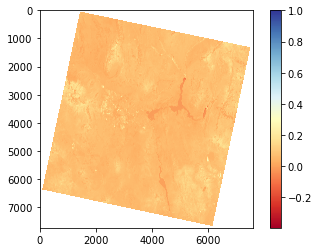

In [83]:
#Calculating ndvi for 2015 desert image
ndvi15D = (nir15D-red15D)/(nir15D+red15D)
plt.imshow(ndvi15D, cmap = 'RdYlBu')
plt.colorbar()

In [84]:
#Total ndvi in the 2015 desert image
np.nanmean(ndvi15D)

0.06981604857183371

In [85]:
os.chdir(r'C:\Users\jdbas\Desert2020')
cwd20D=os.getcwd()

In [86]:
fp20D = glob(os.path.join(cwd20D,'*S*_B*.tif'))
fp20D

['C:\\Users\\jdbas\\Desert2020\\LC08_L2SP_039035_20201126_20210316_02_T1_SR_B1.TIF',
 'C:\\Users\\jdbas\\Desert2020\\LC08_L2SP_039035_20201126_20210316_02_T1_SR_B2.TIF',
 'C:\\Users\\jdbas\\Desert2020\\LC08_L2SP_039035_20201126_20210316_02_T1_SR_B3.TIF',
 'C:\\Users\\jdbas\\Desert2020\\LC08_L2SP_039035_20201126_20210316_02_T1_SR_B4.TIF',
 'C:\\Users\\jdbas\\Desert2020\\LC08_L2SP_039035_20201126_20210316_02_T1_SR_B5.TIF',
 'C:\\Users\\jdbas\\Desert2020\\LC08_L2SP_039035_20201126_20210316_02_T1_SR_B6.TIF',
 'C:\\Users\\jdbas\\Desert2020\\LC08_L2SP_039035_20201126_20210316_02_T1_SR_B7.TIF',
 'C:\\Users\\jdbas\\Desert2020\\LC08_L2SP_039035_20201126_20210316_02_T1_ST_B10.TIF']

In [87]:
b420D = rio.open(fp20D[3])
b520D = rio.open(fp20D[4])

In [88]:
nir20D = b520D.read(1).astype(float)
red20D = b420D.read(1).astype(float)

C:\Users\jdbas\AppData\Local\Temp/ipykernel_8668/3196520413.py:2: RuntimeWarning: invalid value encountered in true_divide
  ndvi20D = (nir20D-red20D)/(nir20D+red20D)


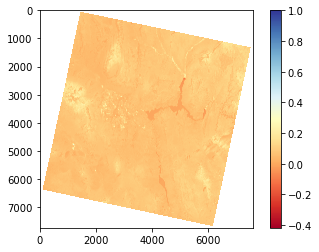

In [89]:
#Calculating ndvi for 2020 desert image
ndvi20D = (nir20D-red20D)/(nir20D+red20D)
plt.imshow(ndvi20D, cmap = 'RdYlBu')
plt.colorbar()

In [90]:
#Total ndvi in the 2020 desert image
np.nanmean(ndvi20D)

0.07719687364059345

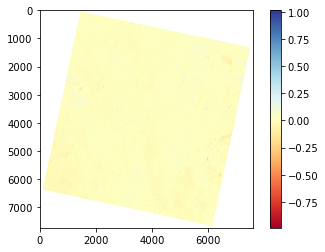

In [91]:
#Caluculating the ndvi change from 2015 to 2020 desert images
ndvi15_20D = ndvi20D - ndvi15D
plt.imshow(ndvi15_20D, cmap = 'RdYlBu')
plt.colorbar()

In [92]:
#Total ndvi change from 2015 to 2020 desert image
((np.nanmean(ndvi20D)-np.nanmean(ndvi15D))/np.nanmean(ndvi15D))*100

10.571817253687184

In [93]:
#Total ndvi change from 2013 to 2020 desert image
((np.nanmean(ndvi20D)-np.nanmean(ndvi13D))/np.nanmean(ndvi13D))*100

11.664031112957774

From 2013 to 2014, NDVI in the urban area increased 14.7%. For the same period, NDVI in the agricultural area dropped 22.6% and NDVI in the desert image increased by 6.4%. From 2015 to 2020, NDVI in the urban area dropped by 5.7%. For the same period, NDVI in the agricultural area dropped by 0.9% and NDVI in the desert image increased by 10.6%.
From 2013 to 2020, the urban area had roughly the same NDVI, with only a 0.7% drop. Over the same period, NDVI increased in the agricultural image by 5.7%. For the desert area, NDVI increased 11.7% from 2013 to 2020.
I am surprised that only the desert area saw improved NDVI between 2015 and 2020 and between 2013 and 2020. Since 2020 is after the drought, I expected to see NDVI to increase in all three images. If the analysis were repeated with average NDVI across each year, rather than NDVI for only one day, NDVI would have improved between 2015 and 2020 and between 2013 and 2020.
